# Linear Regression with Python Scikit Learn

## Simple Linear Regression

### By Charuta U. Kulkarni
#### on 4 Nov 2020

#### Importing Required Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split


In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [58]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### EDA

In [59]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [60]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [61]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [62]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Check for Correlation Cofficient 

In [63]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'Scores')

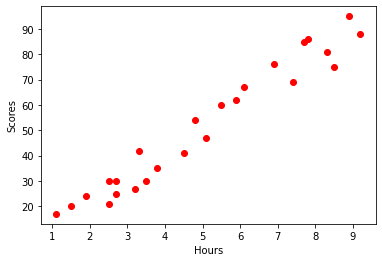

In [64]:
plt.scatter(df.Hours,df.Scores,color = 'red')
plt.xlabel('Hours')
plt.ylabel('Scores')


#### Distribution of Data

c:\users\kulkarni\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


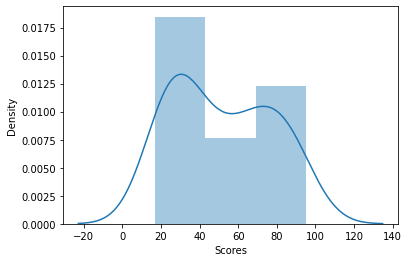

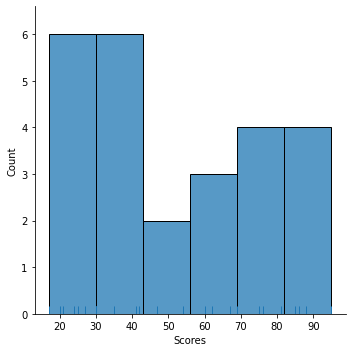

In [65]:
sns.distplot(df["Scores"])
plt.show()

sns.displot(df["Scores"],kde = False,rug = True)
plt.show()

#### Preparing Data

In [66]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 
#print(X_test)
#print(y_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


#### Traning The Algorithm

In [68]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


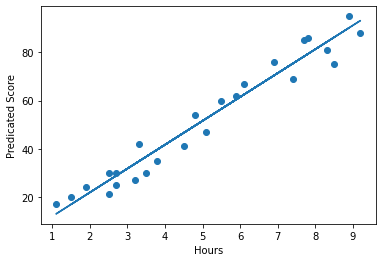

In [70]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.xlabel("Hours")
plt.ylabel("Predicated Score")
plt.plot(X, line);
plt.show()

In [71]:
print(regressor.coef_)
print(regressor.intercept_)

[9.91065648]
2.018160041434669


#### Making Predications

In [72]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [91]:
X_test1 = X_test.flatten()# to convert X_test array to one dimension
print(X_test1)

df2 = pd.DataFrame({'Scores' : X_test1,'Actual' : y_test,'Predicated': y_pred})
df2

[1.5 3.2 7.4 2.5 5.9]


,Scores,Actual,Predicated
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [93]:
#predication for own data
hours = 8.9
h = np.array(hours).reshape(-1,1)
own_pred = regressor.predict(h)
print("Number of Hours Studied {}".format(hours))
print("Marks obtained {}".format(own_pred[0]))

Number of Hours Studied 8.9
Marks obtained 90.2230027191506


#### Evaluating Model

In [98]:
from sklearn import metrics
abs_error = metrics.mean_absolute_error(y_pred,y_test)
print(abs_error)

4.18385989900298
